In [1]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# Workbook 03

## Useful technique for this workbook: Unpacking

A kind of shortcut for splitting up items in a list in Python is called, "unpacking". You have seen this already in the tutorials for the sympy Beam module which look like this:

```python
E, I = symbols("E I")
```
Here is another example:
```python
R1, R2 = symbols("R1 R2")
```

### What is happening here?

The sympy `symbols` function takes a string of symbols separated by commas, spaces, or commas and spaces and return the symbol objects as items in a list. In the cases above, lists with two items each. Using "unpacking" we can assign each item in the list to its own variable in just one line.

More examples:
```python
my_list = ["cat", "bat", 43]
item_1, item_2, item_3 = my_list
```

This is less to type than this:
```python
my_list = ["cat", "bat", 43]
item_1 = my_list[0]
item_2 = my_list[1]
item_3 = my_list[2]
```

Try running the above `my_list` example and try printing out `item_1`, `item_2`, `item_3` to verify for yourself how it works.

**Caution**
If you try to unpack a list, you _must_ have the same number of items in the list as there are variables to unpack to. Otherwise, you will get a `ValueError`:

```python
my_list = ["cat", "bat", 43]
item_1, item_2, item_3, item_4 = my_list
```
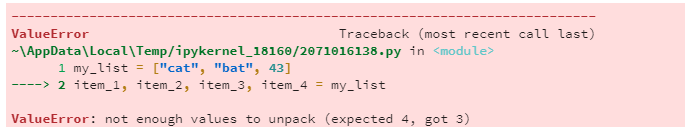

# Task A

1. Use the "file opening template" to open "beam_1.txt" with the `.read()` method and assign the file data to a variable `beam_data`
2. Turn the file data into a list of lines using `.split()`
3. Loop through each of the lines in the file and print them to the notebook

## Task A response

# Task B

In [2]:
lines = [
    "4800, 19200, 1000000",
    "0, 3000",
    "100, 500, 0",
    "200, 3600, 0",
]

1. Use the "transforming" recipe to loop through all of the numbers in just the first line of `lines` (remember, you will need to split the line up first). Convert each number string into an `int` and save each in your accumulator.
2. Do the same thing with the second line, the beam support locations.
3. Now, use the "double loop" recipe to loop through 1) the lines of the loads, then 2) the items in each line (see Lesson 02 reference if you need a refresher on how to slice a list to start at the third line and go to the end). Convert each load parameter into an `int` and accumulate it into a list of lists of ints.

## Task B response

# Task C

In [3]:
L_E_I = [4800, 19200, 80000]
supports = [0, 2000, 4800]
loads = [
    [100, 500, 0],
    [200, 3600, 0],
]

Using the extracted data above (`L_E_I`, `supports`, `loads`), perform the following:

_Hint_: Use the "unpacking" syntax inject the elements of the list into the arguments of the `Beam` (see Lesson 03 Reference).

1. Create a new `Beam` object with the elements of `L_E_I`
2. Using the "transforming" recipe, loop through `loads` and add each load to the beam with `.apply_load()`.
3. Using the "enumeration" recipe, loop through `supports` and perform all of the steps required to add the supports to the beam:
    1. Create a sympy symbol to represent each reaction. Use the enumerator to create symbols that look like this, `"R0"`, `"R1"`, `"R2"`, etc.
    2. Add the reaction symbol to your accumulator
    3. Use `.apply_load()` to add the symbol and support location as a point load support
    4. The beam object has an _attribute_ that we have been using called `.bc_deflection`. This attribtue is an empty list until we put things into it. We can `.append()` to it just like an accumulator. Create the boundary condition as a tuple (like a list but with parentheses) with the support location and `0` to indicate no deflection.
    5. After the loop, call `.solve_for_reaction_loads()` with the reaction symbols in your accumulator passed as the arguments.
    

## Task C response

# Task D

Using the steps that you have practiced in **Task A**, **Task B**, and **Task C**, write a new script to read a beam file, separate the data into lists like in **Task A**, transform the string data into integers like in **Task B**, and accumulate them into lists similar to those seen in **Task C**. 

Input the data accumulated into the lists into a new beam object. Solve for the reaction loads, print the reaction loads, and plot the shear, moment, and deflection diagrams like you did in Workbook 01 and Workbook 02.

## Task D response

# Task E

1. Create a new variable at the top of your **Task D** script called `file_name` that holds the string of the file name to analyze. Replace your `with open()...` line so that it opens the variable, `file_name` instead.
2. Change out the file names with `beam_1.txt`, `beam_2.txt`, and `beam_3.txt` to see the analysis results change.
4. Rename your **Task D** to **Beam Analysis: Beam File Reader Script**
3. Create a new `beam_4.txt` file and put in all new values representing a new beam to analyze. Note that you have to include values for `E` and `I` in the file format for your script to read it properly. What happens if you don't include `E` and `I` in the first line of the file? Try writing some more files and running them! Did any of your experiments "break" your script or cause an error? If so, why do you think that is?
4. You have now written a script that will read in a series of beam parameters from a text file, solve the beam, and plot the results. However, this script has some limitations, including:
    1. It can only read one beam per file
    2. It can only handle point load reactions
    3. It can only handle deflection boundary conditions
    
Do you have any ideas on what we would need to do in order for it to be able to read multiple beams in one file with any kind of support conditions?

That will be what we work on next week!

# 🧗 Submit Workbook 03

Now you are getting a sense of how you can use Python code to automate tasks. Using `for` loops is a big part of this. But, there is something missing: the ability to make decisions in your `for` loop. Next week, we will learn about using `if`, `elif`, and `else` to handle this automatic decision making process which will allow our beam reading script to handle any kind of input.

For now, email your completed workbook to me at `cferster@rjc.ca` with the subject line `Workbook 03 Submission`

# Bonus

Write a `for` loop that changes the file names of each beam txt file to this format:

```
RJC.012345.1234-PYTHON-COURSE-BEAM_1.txt
```